<a href="https://colab.research.google.com/github/JP109/ML-Basics/blob/main/Supervised%20Learning%20Algorithms/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with following methods:
1. scipy.polyfit
2. scipy.stats.lingress
3. scipy.optimize.curve_fit
4. numpy.linalg.lstsq
5. Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse
6. sklearn.linear_model.LinearRegression

### **Import libraries**

In [1]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Generate random data of a sufficiently large size**

In [2]:
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  if __name__ == '__main__':


### **Draw few random sample points and plot**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  


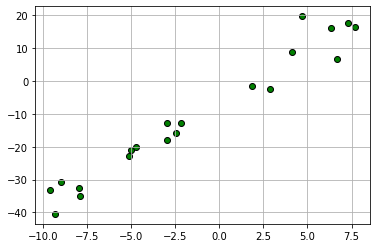

In [3]:
xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

### **1. Scipy.Polyfit**

In [4]:
#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  after removing the cwd from sys.path.


Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 1.440279483795166 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


### **2. Stats.linregress**

In [5]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.07276248931884766 seconds


### **3. Optimize.curve_fit**

In [6]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [7]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 0.5564641952514648 seconds


### **4. numpy.linalg.lstsq**

In [8]:
t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 0.19619369506835938 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


### **5. Statsmodels.OLS**

In [9]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.813471794128418 seconds


In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.888e+36
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:24:41   Log-Likelihood:             1.5031e+08
No. Observations:             5000000   AIC:                        -3.006e+08
Df Residuals:                 4999998   BIC:                        -3.006e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000   9.52e-18  -6.83e+17      0.0

### **6. Analytic solution using Moore-Penrose pseudoinverse**

In [11]:
t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.3635444641113281 seconds


### **7. Analytic solution using simple multiplicative matrix inverse**

In [12]:
t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.08181071281433105 seconds


### **8. sklearn.linear_model.LinearRegression**

In [13]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.35471487045288086 seconds


### **Bucket all the execution times in a list and plot**

In [14]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

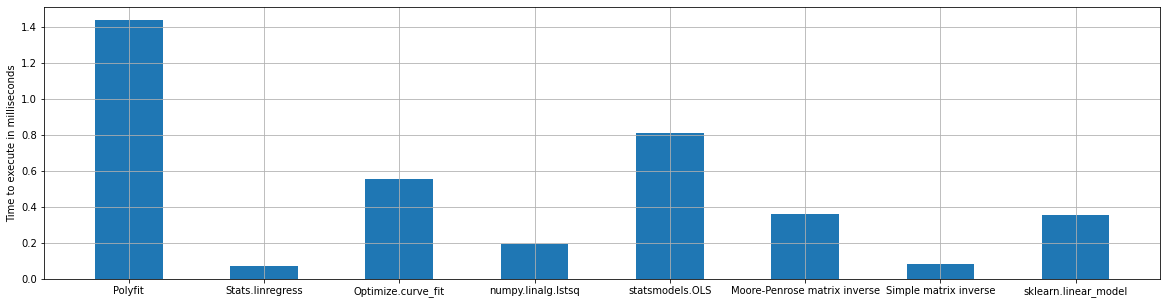

In [27]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.ylabel('Time to execute in milliseconds')
plt.show()

In [18]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [19]:
#time_dict={'Polyfit':[],'Stats.lingress':[],'Optimize.curve_fit':[],'linalg.lstsq':[],'statsmodels.OLS':[],
          #'Moore-Penrose matrix inverse':[],'Simple matrix inverse':[], 'sklearn.linear_model':[]}

l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)

  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launche

In [20]:
df = pd.DataFrame(data=time_dict)
df

,Polyfit,Stats.lingress,Optimize.curve_fit,linalg.lstsq,statsmodels.OLS,Moore-Penrose matrix inverse,Simple matrix inverse,sklearn.linear_model
0,4.513025,1.962900,5.279064,1.861095,11.369467,3.400564,0.913143,6.358624
1,7.716179,1.693249,7.990837,4.550219,13.363361,3.980637,1.057148,6.074667
2,9.388685,1.939297,9.030104,3.767729,14.442921,5.195856,1.474857,7.867336
3,11.363745,2.277136,10.872364,4.692078,18.853188,5.980730,1.646042,9.378672
4,14.242172,2.713442,13.876200,5.868435,20.529985,7.853031,2.343655,12.505770
5,16.913414,3.301144,20.380974,8.413792,26.015520,9.764910,2.524376,14.758825
6,21.639585,3.750801,20.022392,9.864569,34.876347,11.284828,2.898216,18.118143
7,26.688337,4.488707,28.548241,12.002707,34.788132,14.585257,3.948927,21.869898
8,32.512665,5.566597,32.722950,12.545109,48.006773,25.483370,6.510019,27.802706
9,41.632891,7.259607,39.665461,14.131784,50.409794,25.191307,5.897999,32.814026


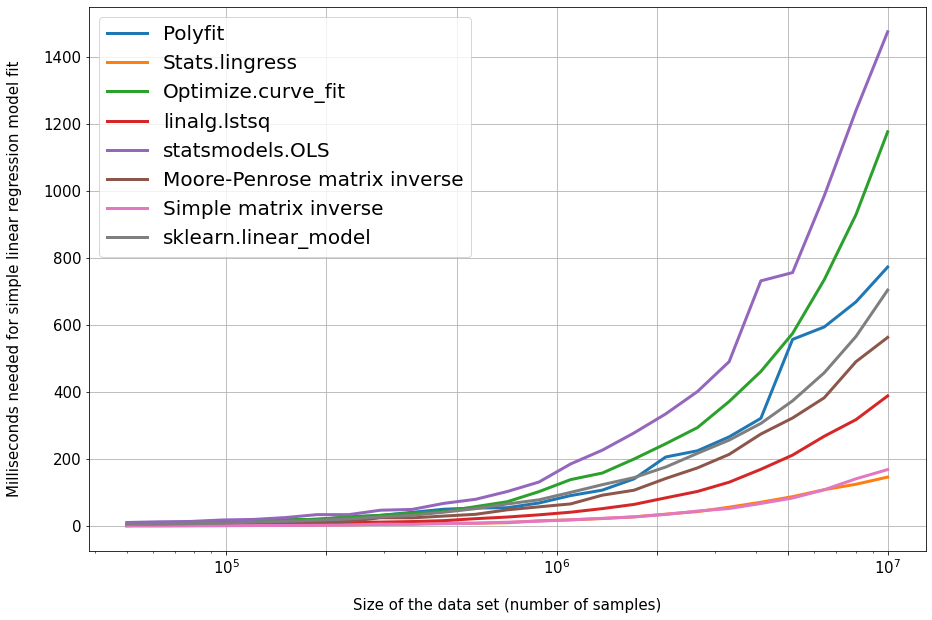

In [21]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [22]:
a1=df.iloc[n_levels-1]

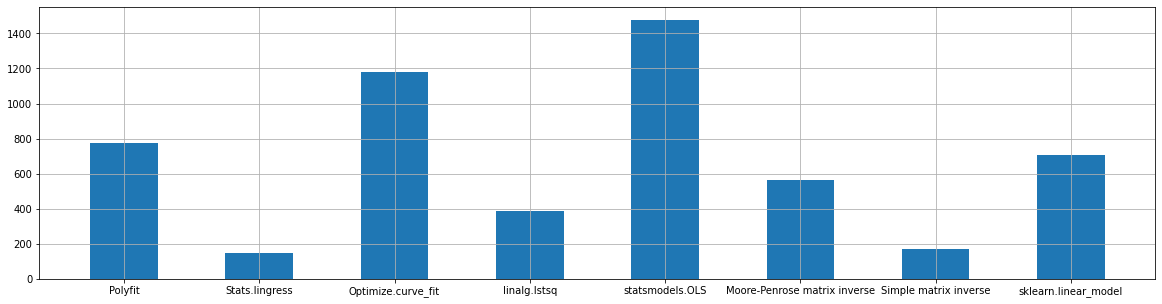

In [24]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()